## OvR

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy.stats import hmean
%matplotlib inline

In [39]:
# データ取得
iris = load_iris()

# ndarrayからdfに変換
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# hold-outでデータを分割する
X = df.loc[:, df.columns!='species']
y = df['species'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

# 学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)

# 予測
y_pred_proba = model.predict_proba(X_test)

In [40]:
n_classes = 3
fpr  = {}
tpr = {}
roc_auc = {}

# クラスごとにループしaucを計算
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

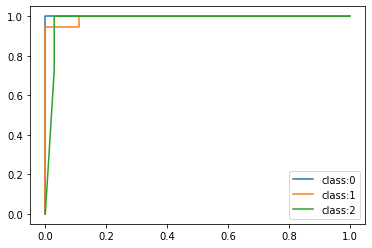

In [41]:
# rocを描画
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class:{i}')

plt.legend()

### macro平均
クラス毎にSensitivity(TPR)と1-Specificity(FPR)を計算し，クラス間で平均を取ってROCを描く

In [46]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr = mean_tpr / len(model.classes_)
mean_tpr

array([0.64814815, 0.98148148, 1.        , 1.        , 1.        ,
       1.        ])

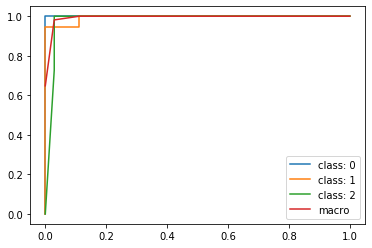

In [47]:
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.legend()


### micro平均
データ全体でSensitivity(TPR)と1-Specificity(FPR)を計算し，ROCを描く

In [48]:
fpr['micro'], tpr['micro'], _ = roc_curve(y_test_one_hot.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

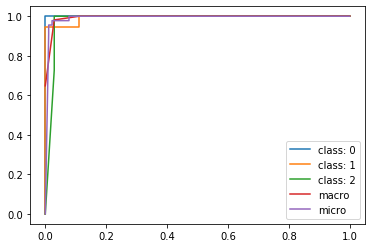

In [49]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class: {i}')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.plot(fpr['micro'], tpr['micro'], label='micro')
plt.legend()

### 線形補完
多クラスのROCを作成する際に使用

In [50]:
all_x = np.arange(7)
data_x = [0, 2, 5, 6]
data_y = [0, 2, 4, 6]
np.interp(all_x, data_x, data_y)

array([0.        , 1.        , 2.        , 2.66666667, 3.33333333,
       4.        , 6.        ])